In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np  

from CodeTFG.auxiliary_functions import *
from CodeTFG.statistics import *
from CodeTFG.presolve_main import *

In [2]:
path_data_TFG = os.path.join(os.getcwd(), "models", "sparsification_results_phillipe.json")

In [3]:
# Defining the function to load data from JSON
def load_data_from_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

# Load the data from the specified JSON file
data = load_data_from_json(path_data_TFG)

# Reading and showing the result of a specific model
model_name = 'ORANI'  # Name of the model
type_model = 'primal'  # primal or dual
key = 'epsilon'  # key considered
MODEL_pr_eps = data[model_name][type_model][key]
print(MODEL_pr_eps)


[0, 0.0015, 0.0018, 0.00216, 0.002592, 0.0031104, 0.0037324800000000003, 0.004478976000000001, 0.005374771200000001, 0.006449725440000002, 0.007739670528000002, 0.009287604633600002, 0.011145125560320003, 0.013374150672384004, 0.016048980806860805, 0.019258776968232964, 0.023110532361879557, 0.027732638834255467, 0.03327916660110656, 0.039934999921327874, 0.04792199990559345, 0.057506399886712134, 0.06900767986405457, 0.08280921583686549, 0.09937105900423858, 0.11924527080508629, 0.14309432496610355, 0.17171318995932427, 0.20605582795118912, 0.24726699354142695, 0.29672039224971236]


In [4]:
Model_name = 'MODELO'
tipo = 'primal'
key = 'of_original_decision'
MODELO_pr_ofod = data[model_name][tipo][key]
divider = MODELO_pr_ofod[0]
# Using a loop to divide each value by the divider
MODELO_pr_ofod_pu = []
for elemento in MODELO_pr_ofod:
    MODELO_pr_ofod_pu.append(elemento / divider)

good_data = MODELO_pr_ofod

# Infeasibility index

In [5]:
# Reading and showing the result of an specific model
model_name = 'IBM1' # Name of the model
tipo = 'primal' # primal or dual
key = 'epsilon' # key considered
modelo_pr_eps = data[model_name][tipo][key]
model_name = 'IBM1' # Name of the model
tipo = 'primal' # primal or dual
key = 'constraint_violation' # key considered
modelo_pr_cv = data[model_name][tipo][key]
modelo_pr_dv = data[model_name][tipo]['decision_variables']
modelo_pr_ci = data[model_name][tipo]['changed_indices']
model_name = 'IBM1' # Name of the model
tipo = 'dual' # primal or dual
key = 'decision_variables' # key considered
modelo_du_dv = data[model_name][tipo][key]
model_name = 'IBM1' # Name of the model
tipo = 'primal' # primal or dual
key = 'of_original_decision' # key considered
modelo_pr_ofod = data[model_name][tipo][key]

cifra_referencia = 1e-6
modelo_pr_cv_sin_nan = remove_nan_sublists(modelo_pr_cv)
modelo_pr_cv_filtrado = set_values_below_threshold_to_zero(modelo_pr_cv_sin_nan,
cifra_referencia)
producto_cv_vd = multiply_matrices(modelo_pr_cv_filtrado,
modelo_du_dv)
suma_producto = sum_sublists(producto_cv_vd)
unfeasiblity_index = [x / abs(modelo_pr_ofod[0]) for x in
suma_producto]

# Complexity index

In [6]:
modelo_pr_cv_medias = calculate_means(modelo_pr_cv)
## Cálculo de los índices cambiados a 0 de la matriz A
acumulado_modelo_ci = calculate_lengths(modelo_pr_ci)
elementos_A_totales = len(modelo_pr_dv) * len(modelo_du_dv)
## Ahora calculamos el número de no 0s en la matriz A, para cada valor
# de epsilon. Esto lo podemos calcular mediante el
## número de índices que cambian en cada nivel de epsilon
elementos_A_que_se_hacen_0_pu = [x / elementos_A_totales for x in
acumulado_modelo_ci]
complexity_problem = [1 - x for x in elementos_A_que_se_hacen_0_pu]


In [7]:
# modelos_tipo1 = ['AIRSP', 'AMPL','ASYNCLOOP','PAPERCO','CHINA',
# 'CLEARLAK', 'DEMO1', 'JOBT', 'LANDS', 'MARKOV', 'MEXSS', 'MINE',
# 'PAKLIVE', 'PRODMIX', 'ROBERT', 'SPARTA', 'SRPCHASE']
# #graphed:
modelos_tipo1 = ['AIRSP', 'PRODMIX', 'SPARTA' ]
# modelos_tipo2 = ['AIRCRAFT', 'BLEND','DIET', 'KAND','SRKANDW','UIMP']
#graphed:
modelos_tipo2 = ['AIRCRAFT']
modelos_tipo3 = ['DEA','GUSSEX1','GUSSGRID','SENSTRAN','TRNSPORT']
#grahped:
modelos_tipo3 = ['GUSSEX1','GUSSGRID','SENSTRAN','TRNSPORT']
modelos_tipo4 = ['IBM1']

# Sensibility analysis

In [8]:
#analisis_de_sensibilidad('IBM1',data)

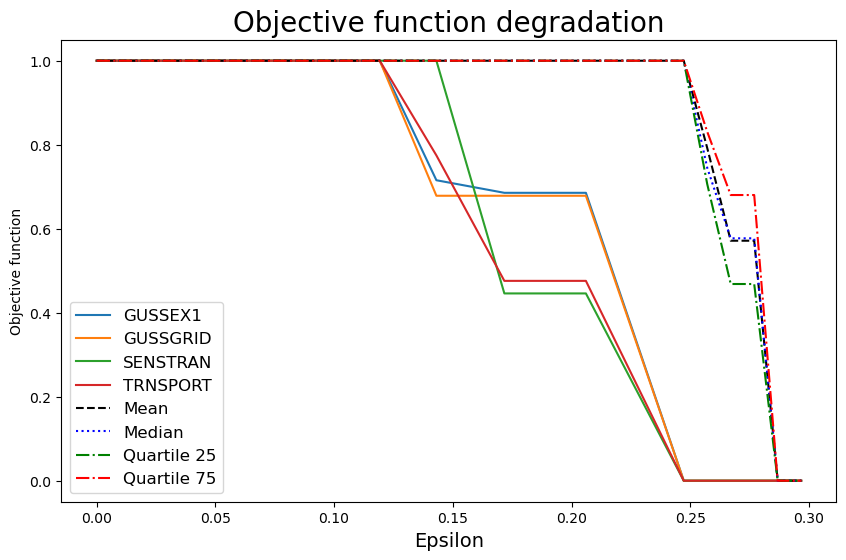

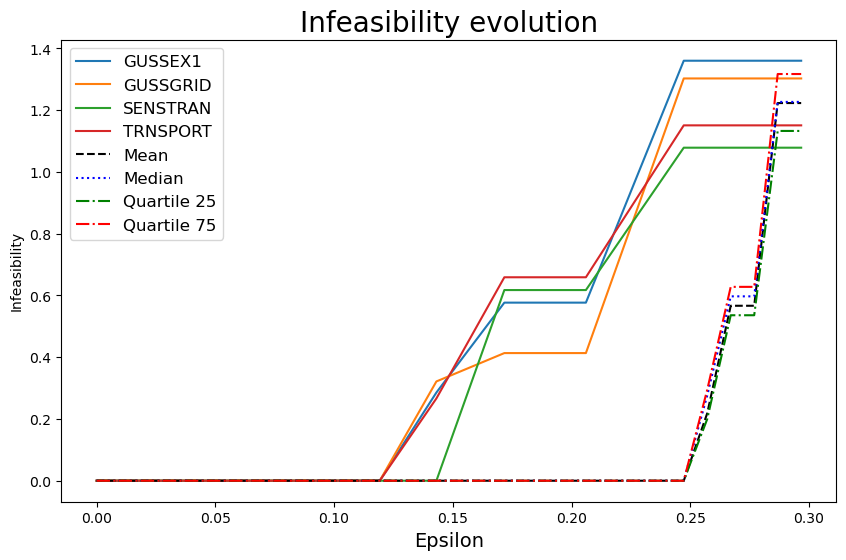

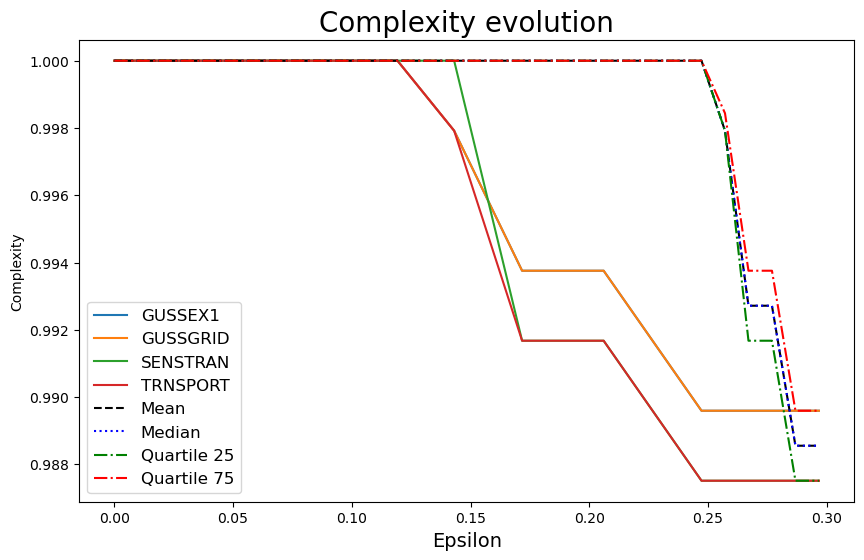

In [9]:
global_sensitivity_analysis(modelos_tipo3, data)